# Fourier analyze the original and the compressed & decompressed signals

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)
import itertools as it
import scipy.signal

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import wave
import struct

In [3]:
class FourierAnalysis:

    def __init__(self, input_filename):
        self.input_filename = input_filename
        self.input_file = wave.open(self.input_filename, 'r')
        self.params = self.input_file.getparams()
        nframes = self.input_file.getnframes()
        self.input_data = np.empty(nframes)
        for f in range(nframes):
            amplitude = self.input_file.readframes(1)
            self.input_data[f] = struct.unpack('=h', amplitude)[0]
        
    def define_analysis_params(self, window_size=320, window_displacement=160):
        self.window_size = window_size
        self.window_displacement = window_displacement
        self.num_windows = self.input_file.getnframes() / self.window_displacement - 1
        
        self.fourier_amplitudes = np.empty((self.num_windows, self.window_size))
        
    def get_hann_times_window(self, window_number):
        start_window = self.window_displacement * window_number
        end_window = start_window + self.window_size
        return scipy.signal.hann(self.window_size) * self.input_data[start_window:end_window]
    
    def fourier_signal(self):
        for window_number in range(self.num_windows):
            self.fourier_amplitudes[window_number] = abs(self.fourier_window(window_number))
    
    def fourier_window(self, window_number):
        return np.fft.fft(self.get_hann_times_window(window_number))
    
    def close_output(self):
        self.output_file.close()

In [14]:
filename = 'demo'

In [15]:
my_FA = FourierAnalysis('wav_examples/{}.wav'.format(filename))
my_FA.define_analysis_params()

In [16]:
my_FA.fourier_signal()

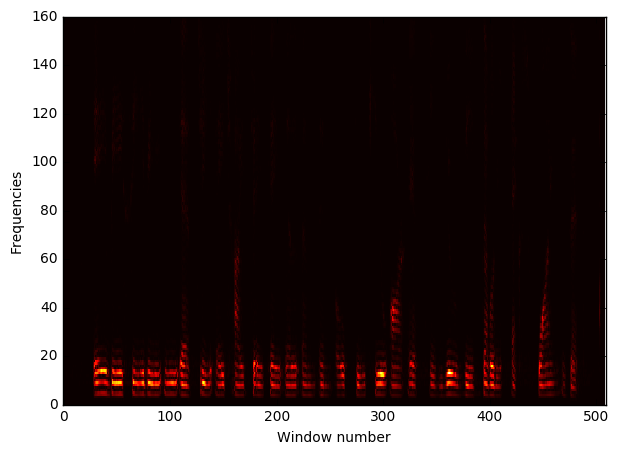

In [17]:
plt.ylim(0, my_FA.window_size / 2)
plt.xlabel('Window number')
plt.ylabel('Frequencies')
plt.imshow(my_FA.fourier_amplitudes.transpose(), cmap=plt.cm.hot, aspect='auto',
          interpolation='None')
#plt.savefig('plots/fourier_{}.eps'.format(filename), bbox_inches='tight')

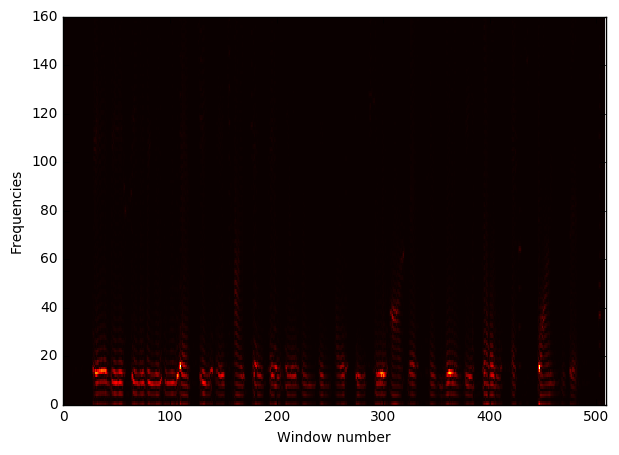

In [18]:
my_FA_output = FourierAnalysis('wav_examples/{}_output.wav'.format(filename))
my_FA_output.define_analysis_params()
my_FA_output.fourier_signal()
plt.ylim(0, my_FA.window_size / 2)
plt.xlabel('Window number')
plt.ylabel('Frequencies')
plt.imshow(my_FA_output.fourier_amplitudes.transpose(), cmap=plt.cm.hot, aspect='auto',
          interpolation='None')
#plt.savefig('plots/fourier_{}_output.eps'.format(filename), bbox_inches='tight')